#### Importing the necessary libraaries

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import*
from fastai.vision import *
from fastai.metrics import error_rate
import pandas as pd

In [3]:
batch_size =64

#### Setting the path 

In [4]:
path = "C:/Users/shahi/.fastai/data/histopathologic-cancer-detection"

In [5]:
path_trn = path+'/train'
path_labels = path+'/train_labels.csv'

In [6]:
path_trn
path_labels

'C:/Users/shahi/.fastai/data/histopathologic-cancer-detection/train_labels.csv'

###  Visualizibg the images

In [7]:
fnames = get_image_files(path_trn)
fnames[:5]

[WindowsPath('C:/Users/shahi/.fastai/data/histopathologic-cancer-detection/train/00001b2b5609af42ab0ab276dd4cd41c3e7745b5.tif'),
 WindowsPath('C:/Users/shahi/.fastai/data/histopathologic-cancer-detection/train/000020de2aa6193f4c160e398a8edea95b1da598.tif'),
 WindowsPath('C:/Users/shahi/.fastai/data/histopathologic-cancer-detection/train/00004aab08381d25d315384d646f5ce413ea24b1.tif'),
 WindowsPath('C:/Users/shahi/.fastai/data/histopathologic-cancer-detection/train/0000d563d5cfafc4e68acb7c9829258a298d9b6a.tif'),
 WindowsPath('C:/Users/shahi/.fastai/data/histopathologic-cancer-detection/train/0000da768d06b879e5754c43e2298ce48726f722.tif')]

In [8]:
import os
os.getcwd()

'C:\\Users\\shahi\\course-v3\\nbs\\dl1'

In [9]:
path_labels

'C:/Users/shahi/.fastai/data/histopathologic-cancer-detection/train_labels.csv'

In [10]:
df = pd.read_csv(path_labels)

In [11]:
len(fnames)

220025

In [12]:
idd = df.iloc[0,0]

In [13]:
idd

'f38a6374c348f90b587e046aac6079959adf3835'

In [14]:
data = (ImageList.from_csv(path=path,csv_name="train_labels.csv",folder="train",suffix=".tif")
       .split_by_rand_pct()
       .label_from_df()
       .transform(tfms=get_transforms(),size=96)
       .databunch(bs=16)
       .normalize(imagenet_stats)) 

In [15]:
data.c

2

In [16]:
len(data.train_ds[4])

2

In [19]:
for name in data.classes:
    if name == "0":
        data.classes = "Non Cacner"
    else:
        data.classes = "Cancer"

In [17]:
data.c

2

In [20]:
data.classes

'Cancer'

In [19]:
data.classes[0] = "Non Cancer"
data.classes[1] = "Cancer"

TypeError: 'str' object does not support item assignment

In [20]:
data.classes

'Cancer'

In [21]:
data.train_ds

LabelList (176020 items)
x: ImageList
Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96)
y: CategoryList
0,0,0,0,1
Path: C:\Users\shahi\.fastai\data\histopathologic-cancer-detection

In [22]:
data.valid_ds

LabelList (44005 items)
x: ImageList
Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96)
y: CategoryList
1,0,1,1,1
Path: C:\Users\shahi\.fastai\data\histopathologic-cancer-detection

In [23]:
len(data.train_dl)

11001

In [24]:
len(data.valid_dl)

2751

In [25]:
len(data.train_ds)

176020

In [26]:
data.valid_dl

DeviceDataLoader(dl=<torch.utils.data.dataloader.DataLoader object at 0x000002788E3B6948>, device=device(type='cuda'), tfms=[functools.partial(<function _normalize_batch at 0x0000027887BCD798>, mean=tensor([0.4850, 0.4560, 0.4060]), std=tensor([0.2290, 0.2240, 0.2250]), do_x=True, do_y=False)], collate_fn=<function data_collate at 0x00000278813F7288>)

In [27]:
len(data.valid_ds)

44005

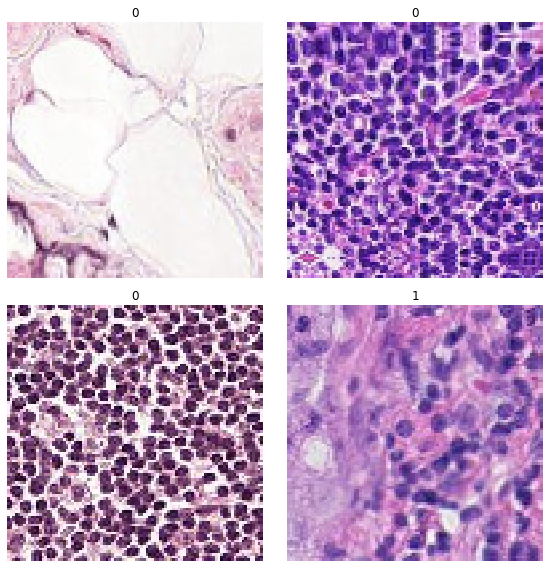

In [28]:
data.show_batch(rows=2)

In [27]:
learn = cnn_learner(data,models.resnet34,metrics=[error_rate,accuracy])

In [18]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.330246,0.255633,0.101466,0.898534,13:08
1,0.307833,0.209499,0.079355,0.920645,14:18
2,0.274435,0.196998,0.075105,0.924895,14:20


AttributeError: 'NoneType' object has no attribute 'fp_16'

In [19]:
learn.save("stage-2")

In [18]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


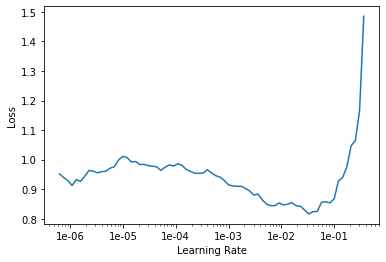

In [19]:
learn.recorder.plot()

In [22]:
learn.unfreeze()
learn.fit_one_cycle(4,1e-6)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.280175,0.200826,0.077128,0.922872,16:45
1,0.226339,0.192966,0.073560,0.926440,17:04
2,0.237956,0.183487,0.068719,0.931281,16:28
3,0.253743,0.188484,0.071992,0.928008,17:06


In [23]:
learn.save('stage-3')

In [24]:
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-3),wd=1e-2)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.240689,0.173619,0.064674,0.935326,16:28
1,0.193708,0.155643,0.057062,0.942938,16:43
2,0.180938,0.147707,0.053539,0.946461,16:37
3,0.170729,0.135334,0.048199,0.951801,16:58


In [25]:
learn.save('stage-4')

### Interpretting the results

In [56]:
inter = ClassificationInterpretation.from_learner(learn)
losses,indx = inter.top_losses()

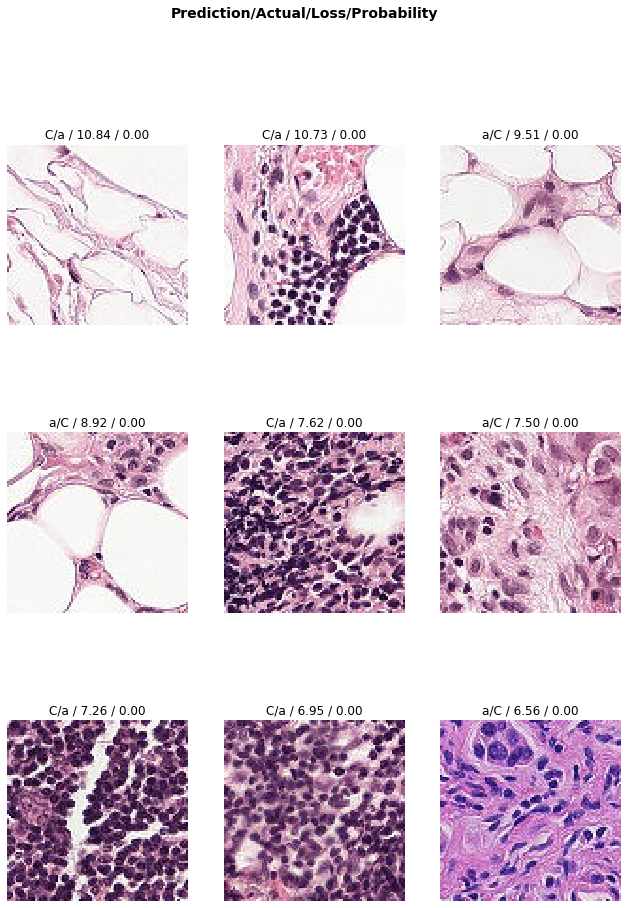

In [57]:
inter.plot_top_losses(9,figsize=(11,15))


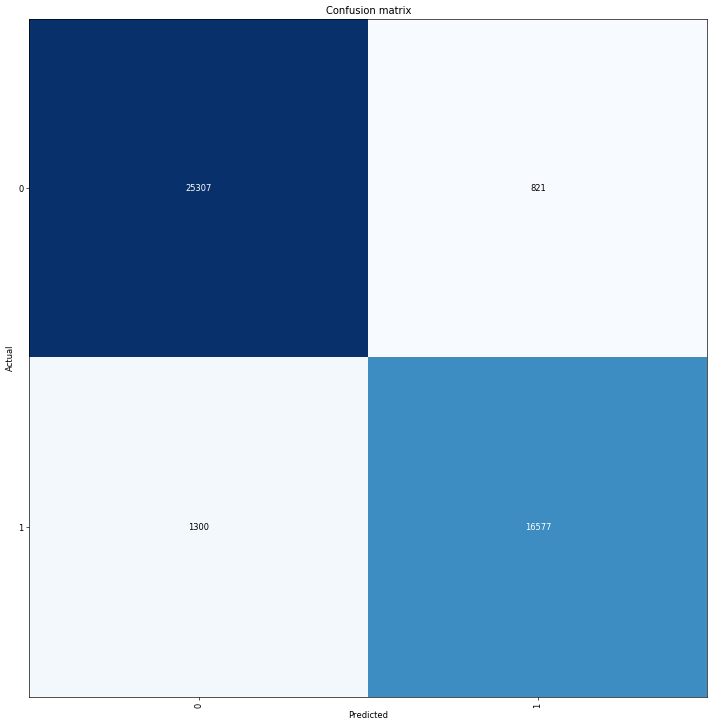

In [58]:
inter.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [71]:
learn.export()

In [28]:
learn.load('stage-4')

Learner(data=ImageDataBunch;

Train: LabelList (176020 items)
x: ImageList
Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96)
y: CategoryList
0,0,0,0,1
Path: C:\Users\shahi\.fastai\data\histopathologic-cancer-detection;

Valid: LabelList (44005 items)
x: ImageList
Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96)
y: CategoryList
1,0,1,1,1
Path: C:\Users\shahi\.fastai\data\histopathologic-cancer-detection;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05,

In [124]:
img = open_image(path+'/test'+'/00a9d5b70627a6c469dc3b250b7750825e85ec65.tif')

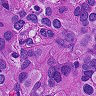

In [125]:
img

In [89]:
learn = load_learner(path)

In [126]:
pred_Class,pred_indx,outputs = learn.predict(img)


In [127]:
pred_Class

Category 1

In [128]:
if pred_Class.obj == 0:
    Predclass = "No cancer"
else:
    Predclass="Cancer"

In [129]:
pred_Class

Category 1

In [130]:
Predclass

'Cancer'

In [80]:
type(pred_Class)

fastai.core.Category

In [131]:
outputs

tensor([0.0039, 0.9961])

In [121]:
pred_Class.obj

1

In [123]:
defaults.device = torch.device('cpu')

### Just visualting the edges in the pic

In [29]:
k = tensor([[0,-5/3,1],
     [-5/3,-5/3,1],
     [1,1,1]]).expand(1,3,3,3)/6

In [30]:
k

tensor([[[[ 0.0000, -0.2778,  0.1667],
          [-0.2778, -0.2778,  0.1667],
          [ 0.1667,  0.1667,  0.1667]],

         [[ 0.0000, -0.2778,  0.1667],
          [-0.2778, -0.2778,  0.1667],
          [ 0.1667,  0.1667,  0.1667]],

         [[ 0.0000, -0.2778,  0.1667],
          [-0.2778, -0.2778,  0.1667],
          [ 0.1667,  0.1667,  0.1667]]]])

In [31]:
k.shape

torch.Size([1, 3, 3, 3])

In [32]:
x = data.valid_ds[3][0].data


In [33]:
data.valid_ds[3][0].data.shape

torch.Size([3, 96, 96])

In [34]:
x.shape

torch.Size([3, 96, 96])

In [82]:
x

torch.Size([1, 3, 96, 96])

In [36]:
edge = F.conv2d(x[None],k)

In [37]:
edge.shape

torch.Size([1, 1, 94, 94])

In [38]:
edge[0]

tensor([[[ 0.0623, -0.0891,  0.0671,  ...,  0.4436,  0.2654, -0.5549],
         [ 0.2000,  0.1913,  0.1126,  ...,  0.2865,  0.1403, -0.4885],
         [-0.0200, -0.2096, -0.4322,  ..., -0.0013,  0.0562, -0.1824],
         ...,
         [ 0.5294,  0.3697, -0.1383,  ..., -0.1155, -0.0436,  0.2096],
         [ 0.1100, -0.2346, -0.4157,  ..., -0.1793, -0.2133,  0.0181],
         [-0.1549, -0.4399, -0.3492,  ...,  0.2203,  0.0468,  0.0505]]])

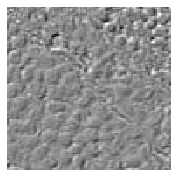

In [39]:
show_image(edge[0])

### Finding the heatmap of activations

In [40]:
m = learn.model.eval()

In [41]:
x,y = data.valid_ds[3]

In [45]:
x.shape

torch.Size([3, 96, 96])

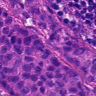

In [46]:
x

In [47]:
xb,_ = data.one_item(x)
xb_im = Image(data.denorm(xb)[0])

In [49]:
xb_im.shape

torch.Size([3, 96, 96])

In [50]:
from fastai.callbacks.hooks import *

In [51]:
def hook_backward(cat=y):
    with hook_output(m[0]) as hook_a:
        with hook_output(m[0] ,grad= True) as hook_g:
            preds = m(xb)
            preds[0,int(cat)].backward()
    return hook_a,hook_g

In [53]:
hook_a,hook_g = hook_backward()

In [54]:
acts = hook_a.stored[0].cpu()

In [55]:
acts.shape

torch.Size([512, 3, 3])

In [56]:
avf_acts = acts.mean(0)

In [57]:
avf_acts.shape

torch.Size([3, 3])

In [60]:
def show_heatmap(hm):
    _,ax = plt.subplots()
    xb_im.show(ax)
    ax.imshow(hm, alpha=0.6, extent=(0,96,96,0),
              interpolation='bilinear', cmap='magma');

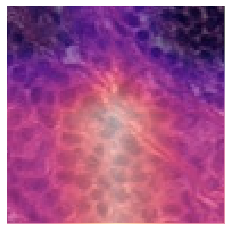

In [61]:
show_heatmap(avf_acts)